<a href="https://colab.research.google.com/github/harshitamotwani/ML_DL/blob/master/sign_language_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
#The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

#download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.

In [3]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
def get_data(filename):
    with open(filename) as training_file:
        file = csv.reader(training_file, delimiter=",")
        all_labels = []
        all_pixels =[]
        first_line = True
        for line in file:
            if first_line:
                first_line = False
            else: 
            
                all_labels.append(line[0])
                image_data = line[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                all_pixels.append(image_data_as_array)
        images = np.array(all_pixels).astype('float')
        labels = np.array(all_labels).astype('float')
        return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

[ 3.  6.  2. ... 18. 17. 23.]
[ 6.  5. 10. ...  2.  4.  2.]
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images, axis =3)
testing_images = np.expand_dims(testing_images, axis =3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')] )

    
tg = train_datagen.flow(training_images, training_labels)
vg = validation_datagen.flow(testing_images, testing_labels) 
# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# Train the Model
history = model.fit_generator(tg, epochs=10, steps_per_epoch=500, validation_data = vg, validation_steps=20)

Epoch 1/10
500/500 [==============================] - 32s 64ms/step - loss: 2.8532 - acc: 0.1395 - val_loss: 2.0015 - val_acc: 0.3562
Epoch 2/10
500/500 [==============================] - 32s 63ms/step - loss: 2.2214 - acc: 0.3046 - val_loss: 1.3535 - val_acc: 0.5672
Epoch 3/10
500/500 [==============================] - 32s 64ms/step - loss: 1.8130 - acc: 0.4244 - val_loss: 1.3047 - val_acc: 0.5531
Epoch 4/10
500/500 [==============================] - 32s 63ms/step - loss: 1.5264 - acc: 0.5050 - val_loss: 0.8295 - val_acc: 0.7312
Epoch 5/10
500/500 [==============================] - 32s 64ms/step - loss: 1.3190 - acc: 0.5768 - val_loss: 0.7852 - val_acc: 0.7141
Epoch 6/10
500/500 [==============================] - 35s 70ms/step - loss: 1.1625 - acc: 0.6174 - val_loss: 0.5964 - val_acc: 0.8109
Epoch 7/10
500/500 [==============================] - 31s 62ms/step - loss: 1.0195 - acc: 0.6636 - val_loss: 0.5496 - val_acc: 0.8031
Epoch 8/10
500/500 [==============================] - 31s 62ms

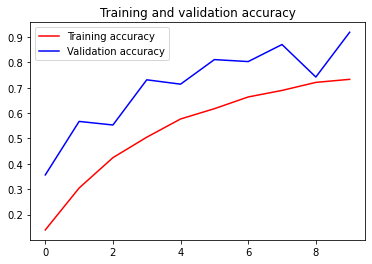

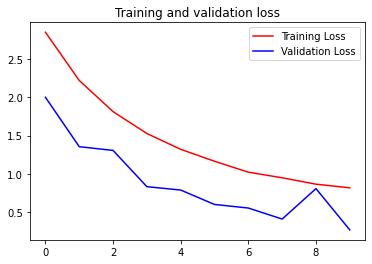

In [16]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()